In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import mean_absolute_error
import statistics 

In [3]:
coulomb__loaded = np.load('coulomb_matrix.npz')
coulomb_matrix = coulomb__loaded['a']
mbtr__loaded = np.load('mbtr_matrix.npz')
mbtr_matrix = mbtr__loaded['b']

acsf__loaded = np.load('acsf_matrix.npz')
acsf_matrix = acsf__loaded['d']


soap__loaded = np.load('saop_matrix.npz')
soap_matrix = soap__loaded['c']
df = pd.read_csv("DScribe_mp_cid_smiles.csv") 
melting_point = df['melting_point']

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [ ]:
print('coulomb_matrix', len(coulomb_matrix), coulomb_matrix[0].shape)
print('mbtr_matrix', len(mbtr_matrix), mbtr_matrix[0].shape)
print('soap_matrix', len(soap_matrix), soap_matrix[0].shape)
print('acsf_matrix', len(acsf_matrix), acsf_matrix[0].shape)

# Coulomb

In [3]:
X_train, X_test, y_train, y_test = train_test_split(coulomb_matrix, melting_point, test_size=0.2, random_state=42)

In [4]:
#check image shape
print(len(X_train),  X_train[2].shape)
print(len(X_test), X_test[2].shape)

475 (55, 55)
119 (55, 55)


In [5]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
#reshape data to fit model
X_train = X_train.reshape(475,55,55,1)
X_test = X_test.reshape(119,55,55,1)

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import Dense, Conv2D, Flatten
from keras.layers.convolutional import MaxPooling2D


model = Sequential()
model.add(Conv2D(100, kernel_size=3, activation= 'linear', input_shape=(55,55,1)))
model.add(Conv2D(100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(1, activation= 'relu'))

Using TensorFlow backend.


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 475 samples, validate on 119 samples
Epoch 1/50
475/475 [==============================] - 16s 34ms/step - loss: 54079.6342 - accuracy: 0.0000e+00 - val_loss: 37226.8204 - val_accuracy: 0.0000e+00
Epoch 2/50
475/475 [==============================] - 14s 28ms/step - loss: 32757.9534 - accuracy: 0.0000e+00 - val_loss: 26464.1135 - val_accuracy: 0.0000e+00
Epoch 3/50
475/475 [==============================] - 17s 35ms/step - loss: 25069.4196 - accuracy: 0.0000e+00 - val_loss: 24284.2987 - val_accuracy: 0.0000e+00
Epoch 4/50
475/475 [==============================] - 14s 29ms/step - loss: 22846.0706 - accuracy: 0.0000e+00 - val_loss: 24379.3770 - val_accuracy: 0.0000e+00
Epoch 5/50
475/475 [==============================] - 14s 28ms/step - loss: 22949.6413 - accuracy: 0.0000e+00 - val_loss: 25302.5325 - val_accuracy: 0.0000e+00
Epoch 6/50
475/475 [==============================] - 14s 30ms/step - loss: 22496.8836 - accuracy: 0.0000e+00 - val_loss: 24609.4476 - val_accuracy: 0.000

KeyboardInterrupt: 

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Mean_squared_error')
plt.legend()
plt.savefig('learning_curve_Coulomb.png', dpi=500)
plt.legend()

In [ ]:
predict = model.predict(X_test)
predictions = []
for i in range(len(predict)):
    predictions.append(predict[i][0])
    
predict_train = model.predict(X_train)
predictions_train = []
for i in range(len(predict_train)):
    predictions_train.append(predict_train[i][0])

In [ ]:
def train_results(predictions_train):
    diff_promedio_train = []
    errores_train = []
    for i in range(len(y_train)):
        x= abs(y_train[i]-predictions_train[i])
        diff_promedio_train.append(x)
    diferencias_promedio_train = statistics.mean(diff_promedio_train)

    slope, intercept, r_value, p_value, std_err = stats.linregress(y_train, predictions_train)
    error = mean_absolute_error(y_train, predictions_train)
    r_squared = r_value**2
    slop = slope
    mean_error = error
    return ('r-squared',  r_squared,'slop', slop, 'mean_error', mean_error)

def test_results(predictions):
    diff_promedio = []
    for i in range(len(y_test)):
        x= abs(y_test[i]-predictions[i])
        diff_promedio.append(x)
    diferencias_promedio_test = statistics.mean(diff_promedio)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, predictions)
    error = mean_absolute_error(y_test, predictions)
    r_squared = r_value**2
    slop = slope
    mean_error = error
    return ('r-squared',  r_squared,'slop', slop, 'mean_error', mean_error)

In [ ]:
train_results(predictions_train)

In [ ]:
test_results(predictions)

# MBTR

In [3]:
X_train, X_test, y_train, y_test = train_test_split(mbtr_matrix, melting_point, test_size=0.2, random_state=35)

In [4]:
#check image shape
print(len(X_train),  X_train[2].shape)
print(len(X_test), X_test[2].shape)

475 (1, 61500)
119 (1, 61500)


In [5]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
#reshape data to fit model
X_train = X_train.reshape(475,100,615)
X_test = X_test.reshape(119,100,615)

In [6]:
X_train.shape

(475, 100, 615)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,615)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))

Using TensorFlow backend.


In [8]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])

In [9]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=100)

Train on 475 samples, validate on 119 samples
Epoch 1/60
475/475 [==============================] - 3s 6ms/step - loss: 300.9591 - mae: 300.9591 - val_loss: 289.0560 - val_mae: 289.0560
Epoch 2/60
475/475 [==============================] - 1s 3ms/step - loss: 300.4250 - mae: 300.4250 - val_loss: 288.1030 - val_mae: 288.1030
Epoch 3/60
475/475 [==============================] - 1s 3ms/step - loss: 298.4673 - mae: 298.4673 - val_loss: 285.6141 - val_mae: 285.6141
Epoch 4/60
475/475 [==============================] - 2s 3ms/step - loss: 293.9080 - mae: 293.9080 - val_loss: 280.7557 - val_mae: 280.7557
Epoch 5/60
475/475 [==============================] - 1s 3ms/step - loss: 285.5324 - mae: 285.5324 - val_loss: 272.6078 - val_mae: 272.6078
Epoch 6/60
475/475 [==============================] - 1s 3ms/step - loss: 272.0494 - mae: 272.0495 - val_loss: 260.1732 - val_mae: 260.1732
Epoch 7/60
475/475 [==============================] - 1s 3ms/step - loss: 251.9475 - mae: 251.9475 - val_loss: 242

Epoch 59/60
475/475 [==============================] - 1s 3ms/step - loss: 132.4136 - mae: 132.4136 - val_loss: 132.4033 - val_mae: 132.4033
Epoch 60/60
475/475 [==============================] - 2s 3ms/step - loss: 132.1388 - mae: 132.1388 - val_loss: 131.6988 - val_mae: 131.6988


dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


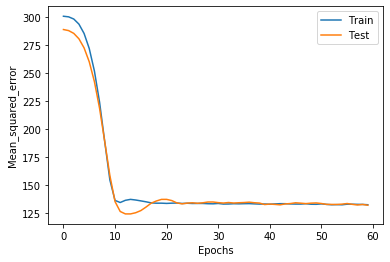

In [10]:
print(history.history.keys())
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Mean_squared_error')
plt.legend()
plt.savefig('learning_curve_MBTR.png', dpi=500)
plt.legend()

# ACSF

In [12]:
from sklearn import preprocessing

acsf_matrix_normalized=[]
for i in range(len(acsf_matrix)):
    acsf_matrix_target = preprocessing.normalize(acsf_matrix[i], norm='l2')
    acsf_matrix_normalized.append(acsf_matrix_target)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(acsf_matrix_normalized, melting_point, test_size=0.2, random_state=56)

In [14]:
#check image shape
print(len(X_train),  X_train[2].shape)
print(len(X_test), X_test[2].shape)

475 (55, 260)
119 (55, 260)


In [15]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
#reshape data to fit model
#X_train = X_train.reshape(243,55,260,1)
#X_test = X_test.reshape(61,55,260,1)

In [16]:
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout
#from keras.layers import Dense, Conv2D, Flatten
#from keras.layers.convolutional import MaxPooling2D

#model = Sequential()
#model.add(Conv2D(32, kernel_size=3, activation= 'linear', input_shape=(55,260,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))

#model.add(MaxPooling2D(pool_size= (2,2))
#model.add(Flatten())
#model.add(Dense(100, activation= 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1, activation= 'relu'))

          
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(55,260)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

Train on 475 samples, validate on 119 samples
Epoch 1/50
475/475 [==============================] - 2s 4ms/step - loss: 111224.9108 - accuracy: 0.0000e+00 - val_loss: 108928.8463 - val_accuracy: 0.0000e+00
Epoch 2/50
475/475 [==============================] - 0s 962us/step - loss: 109258.7734 - accuracy: 0.0000e+00 - val_loss: 106624.8856 - val_accuracy: 0.0000e+00
Epoch 3/50
475/475 [==============================] - 1s 1ms/step - loss: 104747.5189 - accuracy: 0.0000e+00 - val_loss: 102240.0603 - val_accuracy: 0.0000e+00
Epoch 4/50
475/475 [==============================] - 1s 1ms/step - loss: 97103.3631 - accuracy: 0.0000e+00 - val_loss: 95079.8114 - val_accuracy: 0.0000e+00
Epoch 5/50
475/475 [==============================] - 1s 1ms/step - loss: 85218.5275 - accuracy: 0.0000e+00 - val_loss: 84762.7748 - val_accuracy: 0.0000e+00
Epoch 6/50
475/475 [==============================] - 1s 1ms/step - loss: 69507.4451 - accuracy: 0.0000e+00 - val_loss: 71377.3150 - val_accuracy: 0.0000e+0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


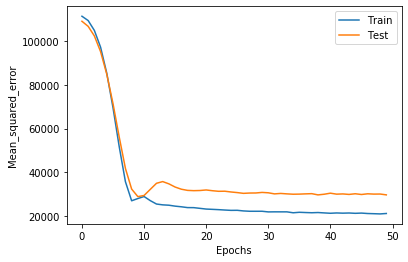

In [19]:
print(history.history.keys())
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Mean_squared_error')
plt.legend()
plt.savefig('learning_curve_ACSF.png', dpi=500)
plt.legend()

# SOAP

In [20]:
len(soap_matrix)

594

In [29]:
soap_matrix_diminished = soap_matrix[:]
melting_point_diminished = melting_point[:]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(soap_matrix_diminished, melting_point_diminished, test_size=0.2, random_state=33)

In [31]:
#check image shape
print(len(X_train),  X_train[2].shape)
print(len(X_test), X_test[2].shape)

475 (1, 13860)
119 (1, 13860)


In [25]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
#reshape data to fit model
X_train = X_train.reshape(243,55,13860,1)
X_test = X_test.reshape(61,55,13860,1)

X_train = X_train.reshape(475,100,615)
X_test = X_test.reshape(119,100,615)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(55,13860)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

ValueError: Error when checking input: expected conv1d_3_input to have shape (55, 13860) but got array with shape (1, 13860)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


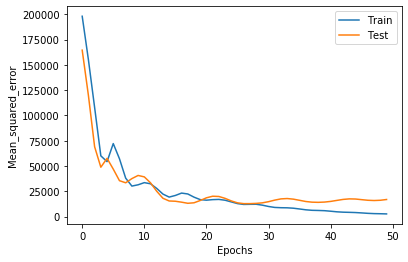

In [15]:
print(history.history.keys())
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Mean_squared_error')
plt.legend()
plt.savefig('learning_curve_SOAP.png', dpi=500)
plt.legend()